In [20]:
# Dependencies and Setup
%matplotlib inline
%config InlineBackend.figure_format='svg'
from IPython.display import display,HTML
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from prettypandas import PrettyPandas
sns.set_style("ticks")
sns.set_context(context="notebook",font_scale=1)

In [21]:
# Read OKCupid Data file
df = pd.read_csv("profiles.csv")
print("The dataset contains {} records".format(len(df)))

# Show dataframe and print dataframe info
males = df[df["sex"]=="m"] # male users
females = df[df["sex"]=="f"] # female users
print("{} males ({:.1%}), {} females ({:.1%})".format(
    len(males),len(males)/len(df),
    len(females),len(females)/len(df)))

df = df.drop(['essay0', 'essay1', 'essay2', 
         'essay3', 'essay4', 'essay4', 
         'essay5', 'essay6', 'essay7', 
         'essay8', 'essay9'], axis=1)
df.head()

The dataset contains 59946 records
35829 males (59.8%), 24117 females (40.2%)


,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [22]:
# Changed all -1 values in income to 0
df = df.replace({-1: None})
df.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,None,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,None,NaN,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,None,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [23]:
# Create dataframe that gets rid of rows where income is not reported
income = df[df.income.notna()]
income.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
11,28,average,mostly anything,socially,never,graduated from college/university,white,72.0,40000,banking / financial / real estate,...,"daly city, california",NaN,straight,likes cats,christianity and very serious about it,m,leo but it doesn&rsquo;t matter,no,"english (fluently), sign language (poorly)",seeing someone
13,30,skinny,mostly anything,socially,never,graduated from high school,white,66.0,30000,sales / marketing / biz dev,...,"san francisco, california",NaN,straight,has dogs and likes cats,christianity but not too serious about it,f,NaN,no,english,single
14,29,thin,mostly anything,socially,never,working on college/university,"hispanic / latin, white",62.0,50000,other,...,"san leandro, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and has cats,catholicism,f,taurus,no,english,single


# Religion & Job/Occupation: Cephra

In [24]:
len(income)

11504

In [25]:
# Create database for religion analysis
religion_df = df
religion_df['religion'].unique()

array(['agnosticism and very serious about it',
       'agnosticism but not too serious about it', nan, 'atheism',
       'christianity', 'christianity but not too serious about it',
       'atheism and laughing about it',
       'christianity and very serious about it', 'other', 'catholicism',
       'catholicism but not too serious about it',
       'catholicism and somewhat serious about it',
       'agnosticism and somewhat serious about it',
       'catholicism and laughing about it',
       'agnosticism and laughing about it', 'agnosticism',
       'atheism and somewhat serious about it',
       'buddhism but not too serious about it',
       'other but not too serious about it', 'buddhism',
       'other and laughing about it',
       'judaism but not too serious about it',
       'buddhism and laughing about it',
       'other and somewhat serious about it',
       'other and very serious about it',
       'hinduism but not too serious about it',
       'atheism but not too ser

In [26]:
# Clean up religion column
rel_vals_to_replace = {'agnosticism and very serious about it': 'agnosticism', 
                   'agnosticism but not too serious about it': 'agnosticism',
                   'agnosticism and somewhat serious about it': 'agnosticism',
                   'agnosticism and laughing about it': 'agnosticism',
                   'atheism and laughing about it': 'atheism',
                   'atheism and somewhat serious about it': 'atheism',
                   'atheism but not too serious about it': 'atheism',
                   'atheism and very serious about it': 'atheism',
                   'buddhism but not too serious about it': 'buddhism',
                   'buddhism and somewhat serious about it': 'buddhism',
                   'buddhism and very serious about it': 'buddhism',
                   'buddhism and laughing about it': 'buddhism',
                   'christianity and very serious about it': 'christianity',
                   'christianity but not too serious about it': 'christianity',
                   'christianity and somewhat serious about it': 'christianity',
                   'christianity and laughing about it': 'christianity',
                   'catholicism but not too serious about it': 'catholicism',
                   'catholicism and somewhat serious about it': 'catholicism',
                   'catholicism and very serious about it': 'catholicism',
                   'catholicism and laughing about it': 'catholicism',
                   'other and somewhat serious about it': 'other',
                   'other and very serious about it': 'other',
                   'other but not too serious about it': 'other',
                   'other and laughing about it': 'other',
                   'judaism and laughing about it': 'judaism',
                   'judaism and very serious about it': 'judaism',
                   'judaism and somewhat serious about it': 'judaism',
                   'judaism but not too serious about it': 'judaism',
                   'hinduism and somewhat serious about it': 'hinduism',
                   'hinduism and very serious about it': 'hinduism',
                   'hinduism but not too serious about it': 'hinduism',
                   'hinduism and laughing about it': 'hinduism',
                   'islam but not too serious about it': 'islam',
                   'islam and laughing about it': 'islam',
                   'islam and somewhat serious about it': 'islam',
                   'islam and very serious about it': 'islam',
                  }
religion_df['religion'] = religion_df['religion'].map(rel_vals_to_replace)
religion_df.religion.unique()

array(['agnosticism', nan, 'christianity', 'atheism', 'catholicism',
       'buddhism', 'other', 'judaism', 'hinduism', 'islam'], dtype=object)

In [27]:
# Drop all rows that have none for religion
religion_df = df.replace({'NaN': None})
religion_df = df[df.religion.notna()]
religion_df

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,None,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
8,24,NaN,strictly anything,socially,NaN,graduated from college/university,white,67.0,None,NaN,...,"belvedere tiburon, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,christianity,f,gemini but it doesn&rsquo;t matter,when drinking,english,single
9,37,athletic,mostly anything,not at all,never,working on two-year college,white,65.0,None,student,...,"san mateo, california",NaN,straight,likes dogs and likes cats,atheism,m,cancer but it doesn&rsquo;t matter,no,english (fluently),single
11,28,average,mostly anything,socially,never,graduated from college/university,white,72.0,40000,banking / financial / real estate,...,"daly city, california",NaN,straight,likes cats,christianity,m,leo but it doesn&rsquo;t matter,no,"english (fluently), sign language (poorly)",seeing someone
13,30,skinny,mostly anything,socially,never,graduated from high school,white,66.0,30000,sales / marketing / biz dev,...,"san francisco, california",NaN,straight,has dogs and likes cats,christianity,f,NaN,no,english,single
15,39,fit,strictly anything,socially,NaN,graduated from college/university,white,65.0,None,medicine / health,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and has cats,atheism,f,aquarius but it doesn&rsquo;t matter,no,"english (fluently), spanish (okay)",single
19,33,athletic,mostly anything,socially,never,graduated from masters program,white,72.0,None,science / tech / engineering,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,catholicism,m,pisces and it&rsquo;s fun to think about,no,english (fluently),single
21,22,athletic,NaN,socially,never,working on college/university,NaN,67.0,None,student,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,catholicism,f,taurus but it doesn&rsquo;t matter,no,"english (fluently), spanish (fluently), italia...",single
22,30,fit,mostly anything,socially,never,graduated from college/university,white,69.0,None,executive / management,...,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism,m,sagittarius but it doesn&rsquo;t matter,no,"english, spanish (poorly)",single


In [28]:
rel_v_job = religion_df.groupby(['religion', 'job']).count().unstack(level=1)
rel_v_job

age                                    \
job          artistic / musical / writer banking / financial / real estate   
religion                                                                     
agnosticism                        513.0                             166.0   
atheism                            409.0                             106.0   
buddhism                           180.0                              48.0   
catholicism                        166.0                             191.0   
christianity                       182.0                             206.0   
hinduism                            15.0                              22.0   
islam                                7.0                               3.0   
judaism                            181.0                              93.0   
other                              639.0                             108.0   

                                                                       \
job          clerical / administrative computer / hardware / software   
religion                                                                
agnosticism                       87.0                          726.0   
atheism                           64.0                          764.0   
buddhism                          22.0                          119.0   
catholicism                      100.0                          219.0   
christianity                      69.0                          217.0   
hinduism                           1.0                           68.0   
islam                              1.0                            7.0   
judaism                           18.0                          205.0   
other                             74.0                          345.0   

                                                                \
job          construction / craftsmanship education / academia   
religion                                                         
agnosticism                          83.0                341.0   
atheism                              59.0                236.0   
buddhism                             29.0                136.0   
catholicism                          83.0                260.0   
christianity                        103.0                218.0   
hinduism                              NaN                  9.0   
islam                                 2.0                  1.0   
judaism                              15.0                214.0   
other                               137.0                297.0   

                                                           \
job          entertainment / media executive / management   
religion                                                    
agnosticism                  304.0                  248.0   
atheism                      190.0                  143.0   
buddhism                      52.0                   68.0   
catholicism                  135.0                  158.0   
christianity                 129.0                  200.0   
hinduism                      10.0                   21.0   
islam                          5.0                    4.0   
judaism                      113.0                  118.0   
other                        192.0                  195.0   

                                                          ...       status  \
job          hospitality / travel law / legal services    ...     military   
religion                                                  ...                
agnosticism                 162.0                144.0    ...         15.0   
atheism                      85.0                 93.0    ...         12.0   
buddhism                     22.0                 29.0    ...          5.0   
catholicism                 114.0                111.0    ...         23.0   
christianity                 76.0                 95.0    ...         40.0   
hinduism                      3.0                  8.0    ...          Na

# Astrological Sign & Job/Occupation: Cephra

In [29]:
sign_df = df
sign_df['sign'].unique()

array(['gemini', 'cancer', 'pisces but it doesn&rsquo;t matter', 'pisces',
       'aquarius', 'taurus', 'virgo', 'sagittarius',
       'gemini but it doesn&rsquo;t matter',
       'cancer but it doesn&rsquo;t matter',
       'leo but it doesn&rsquo;t matter', nan,
       'aquarius but it doesn&rsquo;t matter',
       'aries and it&rsquo;s fun to think about',
       'libra but it doesn&rsquo;t matter',
       'pisces and it&rsquo;s fun to think about', 'libra',
       'taurus but it doesn&rsquo;t matter',
       'sagittarius but it doesn&rsquo;t matter',
       'scorpio and it matters a lot',
       'gemini and it&rsquo;s fun to think about',
       'leo and it&rsquo;s fun to think about',
       'cancer and it&rsquo;s fun to think about',
       'libra and it&rsquo;s fun to think about',
       'aquarius and it&rsquo;s fun to think about',
       'virgo but it doesn&rsquo;t matter',
       'scorpio and it&rsquo;s fun to think about',
       'capricorn but it doesn&rsquo;t matter', 'sc

In [30]:
# Clean up astrology ('sign') column
sign_vals_to_replace = {'pisces but it doesn&rsquo;t matter':'pisces',
                       'gemini but it doesn&rsquo;t matter': 'gemini',
                       'cancer but it doesn&rsquo;t matter': 'cancer',
                       'leo but it doesn&rsquo;t matter': 'leo',
                       'aquarius but it doesn&rsquo;t matter': 'aquarius',
                       'aries and it&rsquo;s fun to think about': 'aries',
                       'libra but it doesn&rsquo;t matter': 'libra',
                       'pisces and it&rsquo;s fun to think about': 'pisces',
                       'taurus but it doesn&rsquo;t matter': 'taurus',
                       'sagittarius but it doesn&rsquo;t matter': 'sagittarius',
                       'scorpio and it matters a lot': 'scorpio',
                       'gemini and it&rsquo;s fun to think about': 'gemini',
                       'leo and it&rsquo;s fun to think about': 'leo',
                       'cancer and it&rsquo;s fun to think about': 'cancer',
                       'libra and it&rsquo;s fun to think about': 'libra',
                       'aquarius and it&rsquo;s fun to think about': 'aquarius',
                       'virgo but it doesn&rsquo;t matter': 'virgo',
                       'scorpio and it&rsquo;s fun to think about': 'scorpio',
                       'capricorn but it doesn&rsquo;t matter': 'capricorn',
                       'capricorn and it&rsquo;s fun to think about': 'capricorn',
                       'aries but it doesn&rsquo;t matter': 'aries',
                       'scorpio but it doesn&rsquo;t matter': 'scorpio',
                       'sagittarius and it&rsquo;s fun to think about': 'sagittarius',
                       'libra and it matters a lot': 'libra',
                       'taurus and it&rsquo;s fun to think about': 'taurus',
                       'leo and it matters a lot': 'leo',
                       'virgo and it&rsquo;s fun to think about': 'virgo',
                       'cancer and it matters a lot': 'cancer',
                       'pisces and it matters a lot': 'pisces',
                       'aries and it matters a lot': 'aries',
                       'capricorn and it matters a lot': 'capricorn',
                       'aquarius and it matters a lot': 'aquarius',
                       'sagittarius and it matters a lot': 'sagittarius',
                       'gemini and it matters a lot': 'gemini',
                       'taurus and it matters a lot': 'taurus',
                       'virgo and it matters a lot': 'virgo'
                  }
sign_df['sign'] = sign_df['sign'].map(sign_vals_to_replace)
sign_df.sign.unique()

SyntaxError: invalid syntax (<ipython-input-30-9e5397a177d6>, line 34)

In [35]:
#%% Investigate heights vs sex vs age
g=income.groupby(["sex","age"])["income"].mean()
fig,(ax1,ax2)=plt.subplots(ncols=2,sharex=True,figsize=(10,3))
ax1.plot(g["male"],color="b")
ax1.set_xlim(18,50)
ax1.set_ylim(0,100000)
ax1.set(title="Average income vs age for males",
        ylabel="income",
        xlabel="age")
ax2.plot(g["female"],color="r")
ax2.set_xlim(18,50)
ax2.set_ylim(0,100000)
ax2.set(title="Average income vs age for females",
        ylabel="income",
        xlabel="age");
for ax in (ax1,ax2):
    sns.despine(ax=ax)
fig.tight_layout()

DataError: No numeric types to aggregate

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,3),sharey=True,sharex=True)
sns.distplot(m["income"], ax=ax1,
             bins=range(20000,1000000),
             kde=False,
             color="b")
ax1.set_title("income distribution for males")
sns.distplot(f["income"], ax=ax2,
             bins=range(20000,1000000),
             kde=False,
             color="r")
ax2.set_title("income distribution for females")
ax1.set_ylabel("Number of users in income group")
for ax in (ax1,ax2):
    sns.despine(ax=ax)
fig.tight_layout()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [43]:
## Ryan's section


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:38: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:45: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


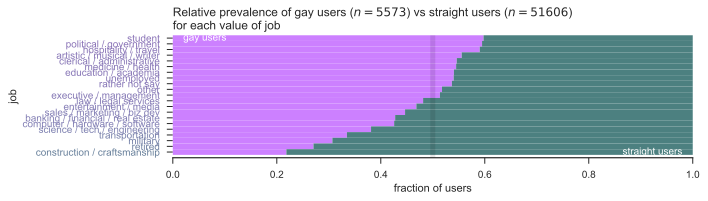

In [52]:
### sexual orientation vs. job
import math

# Define visualization function
def compare_prevalence(series,g1,g2,g1name,g2name,g1color,g2color,ax):
    
    # for each categorical value represented in series, number of users in group g1 which have this value
    g1n=series.loc[g1].value_counts()
    # for each categorical value represented in series, number of users in group g2 which have this value
    g2n=series.loc[g2].value_counts()
    
    # join the two series in a single dataframe, filling 0 where indices don't match
    # (e.g. if a value represented in g1 did never appear in g2)
    df=pd.concat({"g1n":g1n,"g2n":g2n},axis=1).fillna(0)
    # df has one row for every distinct value of series in the union of g1 and g2
    
    # normalize the data
    df["g1f"]=df["g1n"]/(df["g1n"].sum()) # fraction of g1 users with each categorical value
    df["g2f"]=df["g2n"]/(df["g2n"].sum()) # fraction of g2 users with each categorical value
    
    assert(math.isclose(df["g1f"].sum(),1)) 
    assert(math.isclose(df["g2f"].sum(),1))
    
    # for each row of df, we now compute how frequent the value was in g1 compared to the frequency it had in g2.
    df["frac12"]=df["g1f"]/(df["g1f"]+df["g2f"])
    # we expect df["frac12"] to be 0.5 for values that were equally frequent in g1 and g2 (note that this does not depend on the size of g1 and g2)
    # we expect df["frac12"] to be 0 for values that were only seen in g2 and never seen in g1
    # we expect df["frac12"] to be 1 for values that were only seen in g1 and never seen in g2
    
    df=df[(df["g1n"]+df["g2n"])>=50] # exclude values which are too rare
    df=df.sort_values("frac12")
    
    # Draw the left bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"],
                left=0,
                height=1,
                align="center",
                color=g1color,alpha=1)
    # Draw the right bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"]-1,
                left=1,
                height=1,
                align="center",
                color=g2color,alpha=1)
    
    # Draw a faint vertical line for x=0.5
    ax.axvline(x=0.5,color="k",alpha=0.1,linewidth=5)
    ax.set(xlim=[0,1],
           ylim=[-1,len(df)-0.5],
           yticks=range(len(df)),
           yticklabels=df.index,
           xlabel="fraction of users",
           ylabel=series.name)
    
    ax.set_title("Relative prevalence of {} ($n={}$) vs {} ($n={}$)\nfor each value of {}".format(
                g1name,g1.sum(),g2name,g2.sum(),series.name),
                loc="left",fontdict={"fontsize":"medium"})
    ax.text(0.02,len(df)-1,g1name,verticalalignment="center",horizontalalignment="left",size="smaller",color="w")
    ax.text(0.98,0,g2name,verticalalignment="center",horizontalalignment="right",size="smaller",color="w")

    def color_for_frac(f):
        # Blend g1color and g2color according to f (convex linear combination):
        # 0 returns g1color, 1 returns g2color)
        ret=np.array(g1color)*f+np.array(g2color)*(1-f)
        if(np.linalg.norm(ret)>1):          # If the resulting rgb color is too bright for text,
            ret=(ret/np.linalg.norm(ret))*1 # rescale its brightness to dark (but keep hue)
        return ret
        
    for i,tl in enumerate(plt.gca().get_yticklabels()):
        tl.set_color(color_for_frac(df["frac12"].iloc[i]))
        
    sns.despine(ax=ax,left=True)

# Apply visualization function 
fig,ax = plt.subplots(figsize=(10,3))
compare_prevalence(
    series=d["job"],                          # Which categorical attribute?
    g1=d["orientation"]=="gay",      g2=d["orientation"]=="straight",        # Definition of the two groups
    g1name="gay users",   g2name="straight users",   # Names of the two groups
    g1color=[0.8,0.5,1.0], g2color=[0.3,0.5,0.5],   # Colors for the two groups
    ax=ax)
fig.tight_layout()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:46: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0


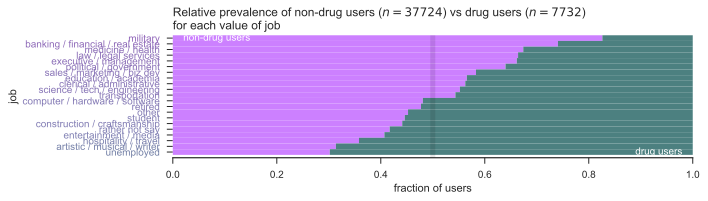

In [54]:
### drugs vs. job
import math

# Define visualization function
def compare_prevalence(series,g1,g2,g1name,g2name,g1color,g2color,ax):
    
    # for each categorical value represented in series, number of users in group g1 which have this value
    g1n=series.loc[g1].value_counts()
    # for each categorical value represented in series, number of users in group g2 which have this value
    g2n=series.loc[g2].value_counts()
    
    # join the two series in a single dataframe, filling 0 where indices don't match
    # (e.g. if a value represented in g1 did never appear in g2)
    df=pd.concat({"g1n":g1n,"g2n":g2n},axis=1).fillna(0)
    # df has one row for every distinct value of series in the union of g1 and g2
    
    # normalize the data
    df["g1f"]=df["g1n"]/(df["g1n"].sum()) # fraction of g1 users with each categorical value
    df["g2f"]=df["g2n"]/(df["g2n"].sum()) # fraction of g2 users with each categorical value
    
    assert(math.isclose(df["g1f"].sum(),1)) 
    assert(math.isclose(df["g2f"].sum(),1))
    
    # for each row of df, we now compute how frequent the value was in g1 compared to the frequency it had in g2.
    df["frac12"]=df["g1f"]/(df["g1f"]+df["g2f"])
    # we expect df["frac12"] to be 0.5 for values that were equally frequent in g1 and g2 (note that this does not depend on the size of g1 and g2)
    # we expect df["frac12"] to be 0 for values that were only seen in g2 and never seen in g1
    # we expect df["frac12"] to be 1 for values that were only seen in g1 and never seen in g2
    
    df=df[(df["g1n"]+df["g2n"])>=50] # exclude values which are too rare
    df=df.sort_values("frac12")
    
    # Draw the left bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"],
                left=0,
                height=1,
                align="center",
                color=g1color,alpha=1)
    # Draw the right bars
    ax.barh(bottom=range(len(df)),
                width=df["frac12"]-1,
                left=1,
                height=1,
                align="center",
                color=g2color,alpha=1)
    
    # Draw a faint vertical line for x=0.5
    ax.axvline(x=0.5,color="k",alpha=0.1,linewidth=5)
    ax.set(xlim=[0,1],
           ylim=[-1,len(df)-0.5],
           yticks=range(len(df)),
           yticklabels=df.index,
           xlabel="fraction of users",
           ylabel=series.name)
    
    ax.set_title("Relative prevalence of {} ($n={}$) vs {} ($n={}$)\nfor each value of {}".format(
                g1name,g1.sum(),g2name,g2.sum(),series.name),
                loc="left",fontdict={"fontsize":"medium"})
    ax.text(0.02,len(df)-1,g1name,verticalalignment="center",horizontalalignment="left",size="smaller",color="w")
    ax.text(0.98,0,g2name,verticalalignment="center",horizontalalignment="right",size="smaller",color="w")

    def color_for_frac(f):
        # Blend g1color and g2color according to f (convex linear combination):
        # 0 returns g1color, 1 returns g2color)
        ret=np.array(g1color)*f+np.array(g2color)*(1-f)
        if(np.linalg.norm(ret)>1):          # If the resulting rgb color is too bright for text,
            ret=(ret/np.linalg.norm(ret))*1 # rescale its brightness to dark (but keep hue)
        return ret
        
    for i,tl in enumerate(plt.gca().get_yticklabels()):
        tl.set_color(color_for_frac(df["frac12"].iloc[i]))
        
    sns.despine(ax=ax,left=True)

# Apply visualization function 
fig,ax = plt.subplots(figsize=(10,3))
compare_prevalence(
    series=d["job"],                          # Which categorical attribute?
    g1=d["drugs"]=="never",      g2=d["drugs"]=="sometimes",        # Definition of the two groups
    g1name="non-drug users",   g2name="drug users",   # Names of the two groups
    g1color=[0.8,0.5,1.0], g2color=[0.3,0.5,0.5],   # Colors for the two groups
    ax=ax)
fig.tight_layout()

# New Assignments for Team
 - Jarvis to focus on lat/lng & plotting geolocation (Geography)
 - Ryan to focus on jobs vs. drugs, drinks, smoking, sexual orientation (Substance Use)
 - Tati to focus on jobs vs. age, income, education (Economics)
 - Cephra to focus on religion, astrological sign, offspring (Spiritual)

#age	body_type	diet	drinks	drugs	education	ethnicity	height	income	job	last_online	location	offspring	orientation	pets	religion	sex	sign	smokes	speaks	status


#age vs drinks vs drug
#age vs religion
#location vs sign
#age vs smoke
#height vs income
#income vs drinks vs drug
#income vs education
#body_type vs location
#ethnicity vs job or income
    


